<a href="https://colab.research.google.com/github/MrBendji/Marketing_Strategy_Segmentation/blob/master/Customer_Segmentation_for_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing Targeted Marketing Strategies for Banking Services


###**Project Context: Understanding Our Bank's Customers**

In the dynamic world of banking, customer-centric strategies are crucial for long-term success. To stay ahead in the competitive financial sector, our bank is embarking on a mission to understand our customers better and tailor our services to their unique needs. This project focuses on customer segmentation—a vital process that involves grouping clients into distinct categories based on their characteristics and behaviors.

The data used for this project comes from Kaggle (available [here](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets/data)).


### **Objective:**

The primary goal of this project is to use customer segmentation techniques to better understand our bank's customers. By grouping customers into different categories based on their characteristics, we want to:

1. **Improve Tailored Marketing:** Create marketing strategies that are just right for each group of customers, so we can better keep them as clients.

2. **Make Better Business Choices:** Make smarter decisions about our bank's products and services, based on what each group of customers likes and needs.

3. **Offer a Better Experience:** Provide services and products that fit the specific needs of each group of customers.

4. **Increase Our Bank's Success:** Find opportunities to suggest other products or services that each group of customers might be interested in.

5. **Build Stronger Customer Relationships:** Make our clients happy by giving them exactly what they need.

By doing these things, we aim to help our bank grow and succeed while making our clients happier.

In [5]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [6]:
df = pd.read_csv('./train.csv', sep=';')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- The dataset we're using has 17 columns (gathering information on the bank's customer and information on the last contact of the current campaign) and 45211 rows, also no missing values.
- All we need for our project is customer information, which includes information on the following variables:
    1. **Age**: Numeric variable representing the age of the client.

    2. **Job**: Categorical variable indicating the type of job the client has. Categories include "admin," "unknown," "unemployed," "management," and more.

    3. **Marital**: Marital status of the client, with categories "married," "divorced," and "single." Note that "divorced" represents both divorced and widowed clients.

    4. **Education**: Categorical variable describing the client's education level, with categories such as "unknown," "secondary," "primary," and "tertiary."

    5. **Default**: Binary variable (yes/no) indicating whether the client has credit in default.

    6. **Balance**: Numeric variable representing the average yearly balance in euros.

    7. **Housing**: Binary variable (yes/no) indicating whether the client has a housing loan.

    8. **Loan**: Binary variable (yes/no) indicating whether the client has a personal loan.

In [9]:
cliend_variables = ["age","job", "marital", "education", "default", "balance", "housing", "loan"]
client_data = df[cliend_variables]
client_data

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no
45207,71,retired,divorced,primary,no,1729,no,no
45208,72,retired,married,secondary,no,5715,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


In [10]:
client_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
client_data.marital.value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [12]:
client_data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

The presence of "unknown" values in the "job" and "education" columns in the dataset typically indicates missing or unrecorded information for those specific clients.

**1. "Job" Column ("job" variable):**

- "Unknown" in the "job" column suggests that the type of job for these clients is either missing from the dataset or was not recorded. This could occur for several reasons:
  - The client may have declined to provide their job information during account setup or data collection.
  - Data entry errors or omissions during the collection process could result in missing values.
  - Some clients may not have a formal job title due to various reasons (e.g., retired, homemakers, students) or could be self-employed in a way that doesn't fit traditional job categories.

**2. "Education" Column ("education" variable):**

- "Unknown" in the "education" column indicates a lack of information about the educational background of those clients. Similar to the "job" column, the presence of "unknown" values could be due to:
  - Clients choosing not to disclose their education level.
  - Data collection errors or gaps.
  - Some clients may not have a formal education background.

Handling "unknown" values:
- When working with these "unknown" values, i  can attempt to fill in missing values based on patterns in the data, such as using the mode (most frequent value) for categorical variables like "job" and "education."

In [13]:
client_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
# Columns to clean
columns_to_clean = ['job', 'education']

for column_to_clean in columns_to_clean:
    # Calculate the mode (most frequent value) in the specified column
    mode_value = client_data[column_to_clean].mode()[0]

    # Replace 'unknown' values with the mode
    client_data[column_to_clean] = client_data[column_to_clean].replace('unknown', mode_value)

<ipython-input-14-8c2351857129>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data[column_to_clean] = client_data[column_to_clean].replace('unknown', mode_value)
<ipython-input-14-8c2351857129>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data[column_to_clean] = client_data[column_to_clean].replace('unknown', mode_value)


In [15]:
client_data.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


## Exploratory Data Analysis

In [16]:
client_data.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,secondary,no,1506,yes,no
4,33,blue-collar,single,secondary,no,1,no,no


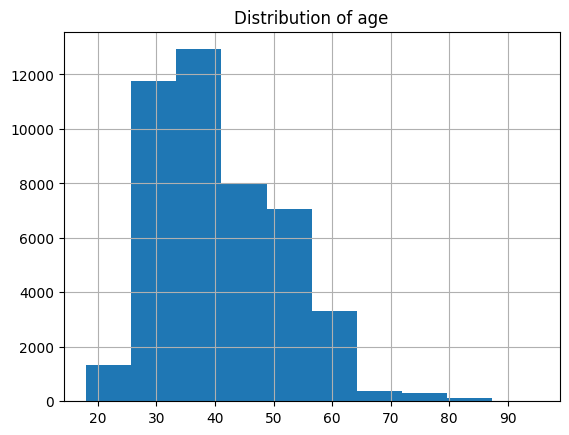

In [17]:
#sns.distplot(client_data['age'])
client_data['age'].hist()
plt.title('Distribution of age');

- The histogram shows that most of our clients are between the ages of 20 and 60.

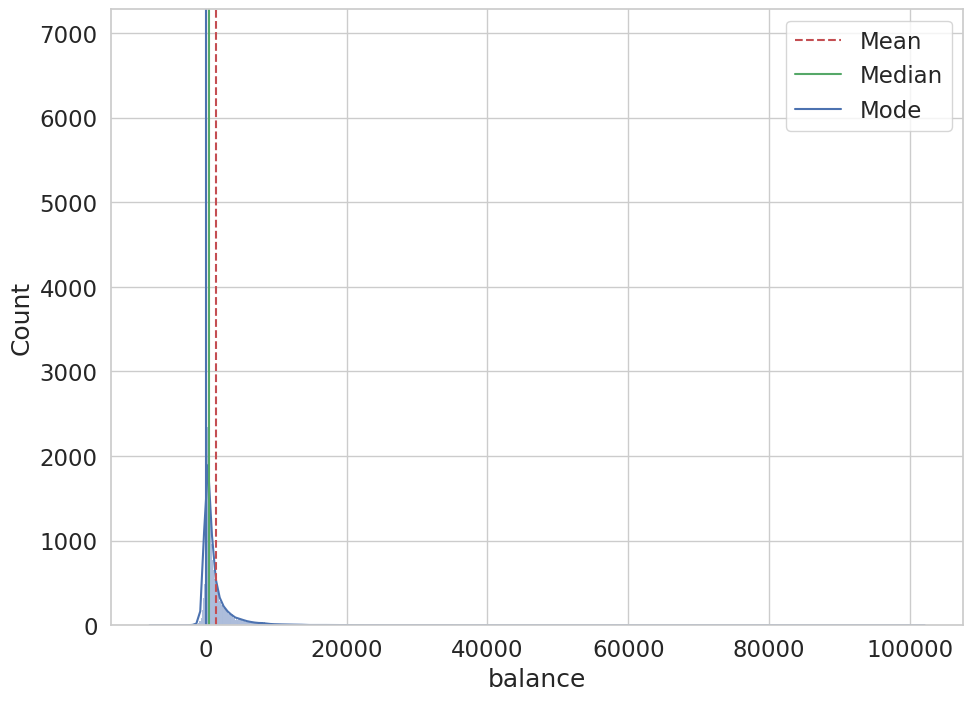

In [18]:
sns.set(rc={'figure.figsize': (11, 8)}, font_scale=1.5, style='whitegrid')
mean = client_data['balance'].mean()
median = client_data['balance'].median()
mode = client_data['balance'].mode().values[0]

# Create a subplot with a histogram chart
f, ax_hist = plt.subplots()
sns.histplot(data=client_data, x="balance", ax=ax_hist, kde=True)

# Add vertical lines for mean, median, and mode
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()


plt.show()

- The green line indicates a median of 0, which means that most of the bank's customers have an average annual balance close to zero.

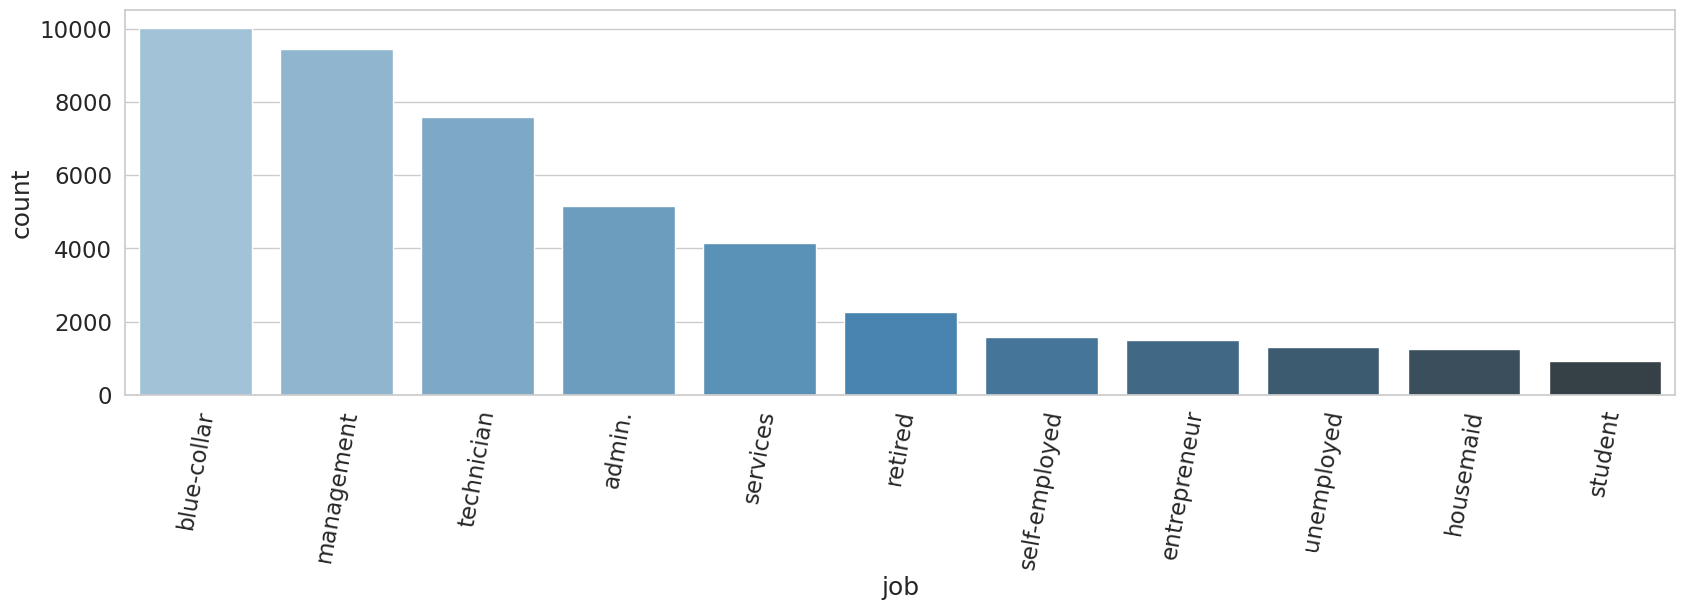

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='job', data=client_data, order=client_data['job'].value_counts().index, palette="Blues_d")
plt.xticks(rotation=80);

- The majority of the bank's clientele consists of individuals employed in management, blue-collar, and technical professions.

In [20]:
client_data['job'].value_counts(normalize=True)

blue-collar      0.221627
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
Name: job, dtype: float64

In [21]:
edu_pct = client_data['education'].value_counts(normalize=True)
print(edu_pct)

secondary    0.554268
tertiary     0.294198
primary      0.151534
Name: education, dtype: float64


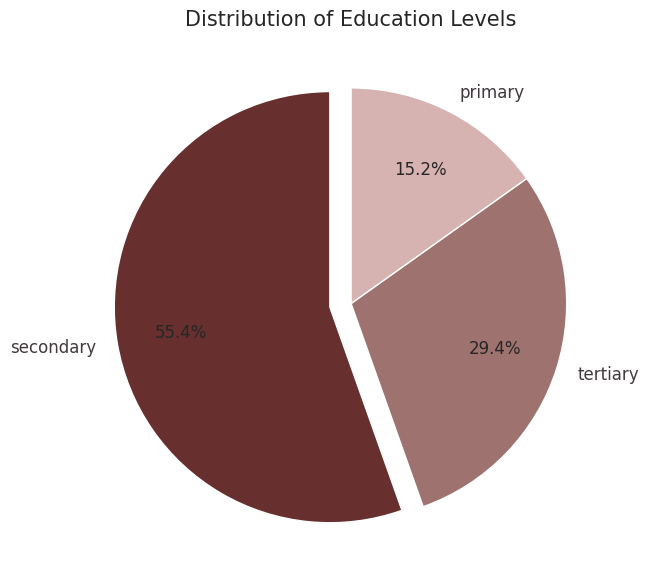

In [22]:
plt.figure(figsize=(7,7))
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
patches, texts, autotexts = plt.pie(x=edu_pct, autopct='%1.1f%%', explode=[0.1,0,0],
                                    startangle=90, labels=edu_pct.index, pctdistance=0.7,
        colors = ["#682F2F", "#9E726F", "#D6B2B1"])
for text in texts:
    text.set_color('#41393E')
    text.set_fontsize(12)

plt.title("Distribution of Education Levels", size=15)

plt.tight_layout
plt.show()

We can see that 55% of our customers are secondary level.

In [23]:
marital_pct = client_data['marital'].value_counts(normalize=True)
print(marital_pct)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


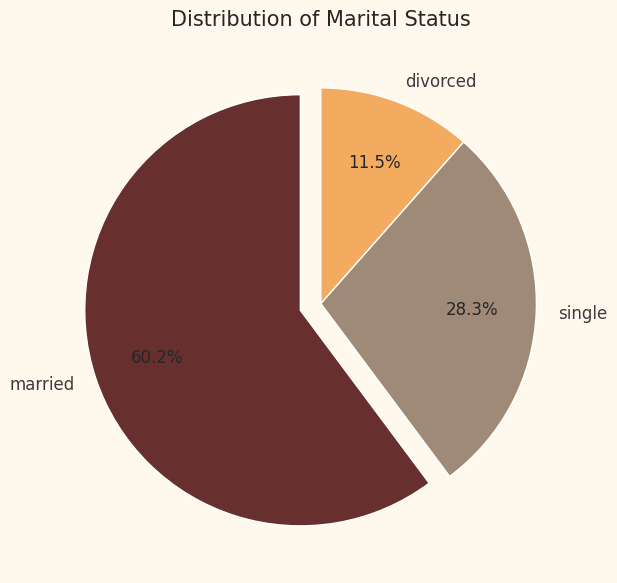

In [24]:
plt.figure(figsize=(7,7))
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
patches, texts, autotexts = plt.pie(x=marital_pct, autopct='%1.1f%%', explode=[0.1,0,0],
                                    startangle=90, labels=marital_pct.index, pctdistance=0.7,
        colors = ["#682F2F", "#9F8A78", "#F3AB60"])
for text in texts:
    text.set_color('#41393E')
    text.set_fontsize(12)

plt.title("Distribution of Marital Status", size=15)

plt.tight_layout
plt.show()

We can see that 60% of our customers are married.

In [25]:
default_pct = client_data['default'].value_counts(normalize=True)
print(default_pct)

no     0.981973
yes    0.018027
Name: default, dtype: float64


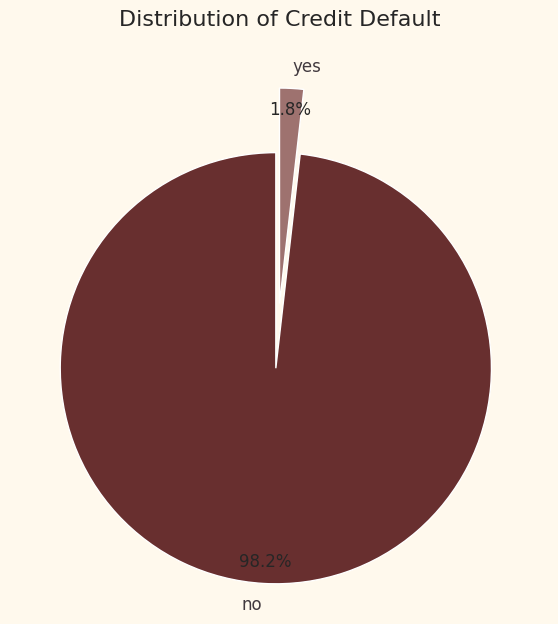

In [26]:
plt.figure(figsize=(7, 7))
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
patches, texts, autotexts = plt.pie(x=default_pct, autopct='%1.1f%%', explode=[0.3, 0],
                                    startangle=90, labels=default_pct.index, pctdistance=0.9,
                                    colors=["#682F2F", "#9E726F"])
for text in texts:
    text.set_color('#41393E')
    text.set_fontsize(12)

plt.title("Distribution of Credit Default", size=16)

plt.tight_layout
plt.show()

- The majority of our customers (approximately 98%) have no credit default, while a small percentage (about 2%) fall into the 'yes' category, indicating a relatively rare occurrence of credit defaults within our client base.

In [27]:
client_data
client_data.dropna(inplace=True)

<ipython-input-27-237b12086750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data.dropna(inplace=True)


In [28]:
housing_pct = client_data['housing'].value_counts(normalize=True)
print(housing_pct)

yes    0.555838
no     0.444162
Name: housing, dtype: float64


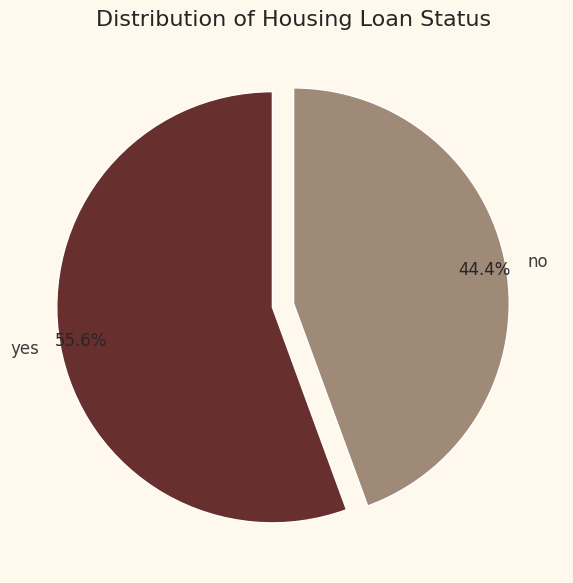

In [29]:
plt.figure(figsize=(7, 7))
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
patches, texts, autotexts = plt.pie(x=housing_pct, autopct='%1.1f%%',
                                    startangle=90, explode=[0.1, 0], labels=housing_pct.index, pctdistance=0.9,
                                    colors=["#682F2F", "#9F8A78"])
for text in texts:
    text.set_color('#41393E')
    text.set_fontsize(12)

plt.title("Distribution of Housing Loan Status", size=16)

plt.tight_layout
plt.show()

- 56% of clients have a housing loan , while 44% do not. A balanced distribution for potential marketing insights.

In [30]:
loan_pct = client_data['loan'].value_counts(normalize=True)
print(loan_pct)

no     0.839774
yes    0.160226
Name: loan, dtype: float64


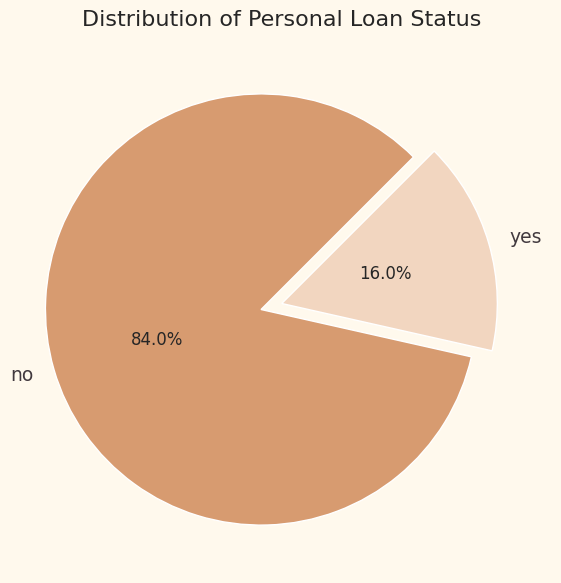

In [31]:
plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(x=loan_pct, autopct='%1.1f%%', explode=[0.1, 0],
                                    startangle=45, labels=loan_pct.index, pctdistance=0.5,
        colors=['#D79B70', '#F2D6C0'])
for text in texts:
    text.set_color('#41393E')
    text.set_fontsize(13.5)
for autotext in autotexts:
    autotext.set_fontsize(12)

# Add a title to the pie chart
plt.title("Distribution of Personal Loan Status", size=16)

plt.tight_layout
plt.show()


- The majority of clients (84%) do not have a personal loan , while a smaller fraction (16%) have a personal loan . This indicates a notable imbalance in personal loan status, with a significant portion of clients not holding personal loans.

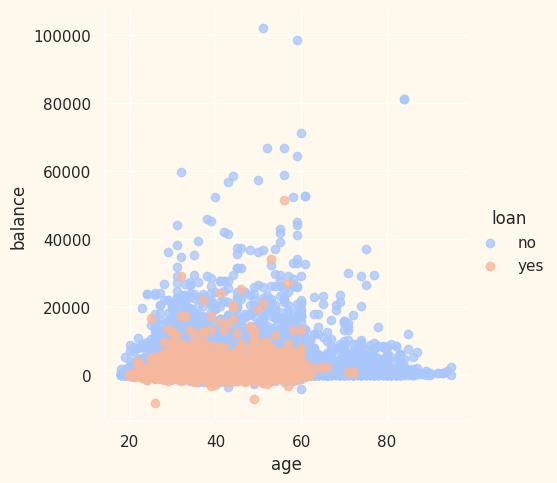

In [32]:
sns.lmplot(x='age',y='balance',data=client_data, hue='loan', palette='coolwarm',height=5,aspect=1,fit_reg=False);

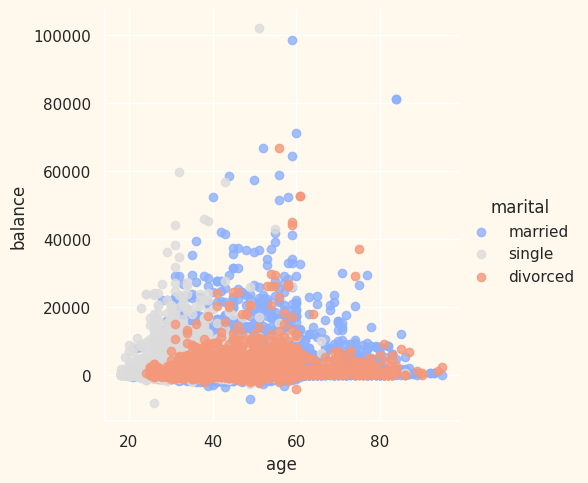

In [33]:
sns.lmplot(x='age',y='balance',data=client_data, hue='marital', palette='coolwarm',height=5,aspect=1,fit_reg=False);

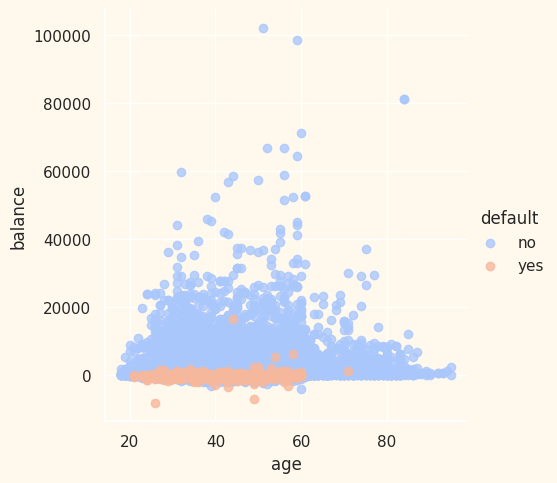

In [34]:
sns.lmplot(x='age',y='balance',data=client_data, hue='default', palette='coolwarm',height=5,aspect=1,fit_reg=False);

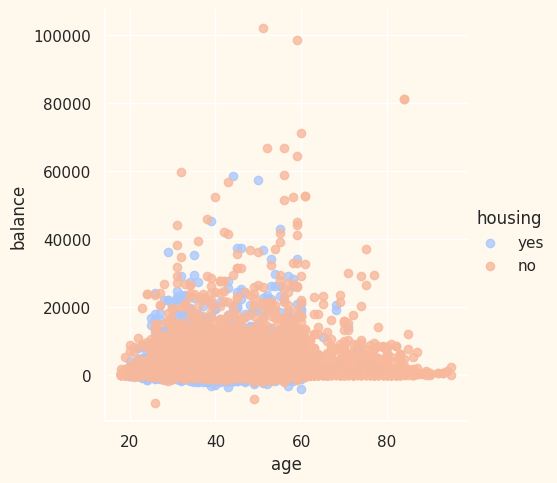

In [35]:
sns.lmplot(x='age',y='balance',data=client_data, hue='housing', palette='coolwarm',height=5,aspect=1,fit_reg=False);

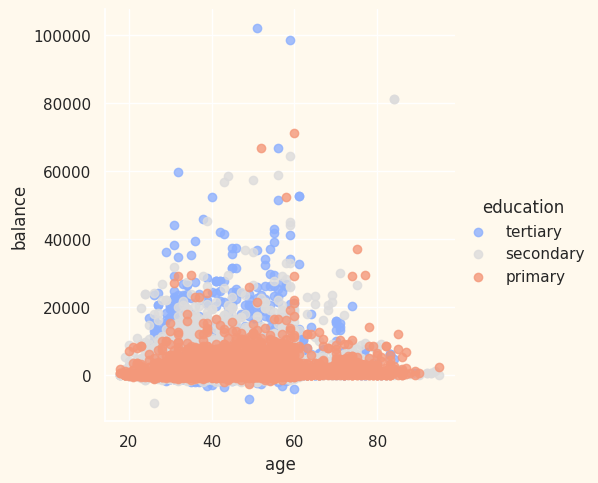

In [36]:
sns.lmplot(x='age',y='balance',data=client_data, hue='education', palette='coolwarm',height=5,aspect=1,fit_reg=False);

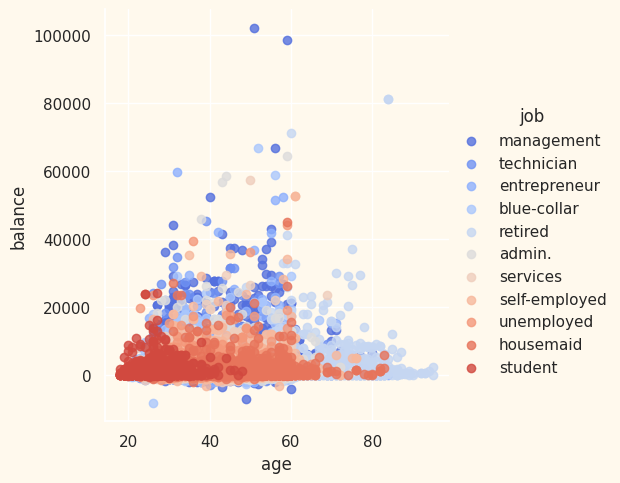

In [37]:
sns.lmplot(x='age',y='balance',data=client_data, hue='job', palette='coolwarm',height=5,aspect=1,fit_reg=False);

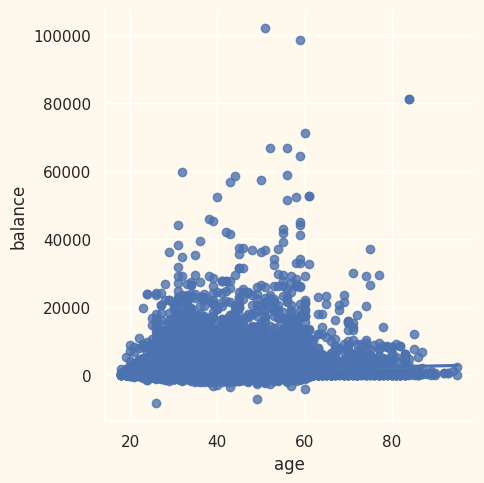

In [38]:
sns.lmplot(x='age',y='balance', data=client_data);

- Clearly, there are a few outliers in the Balance and Age features. I will be deleting the outliers in the data.

## Data preprocessing

Because we have numerical variables, we must make certain modifications to them. It is always recommended that all numerical variables be on similar scales and with distributions as close as possible to Gaussian ones.

The `PowerTransformer` is a preprocessing technique in scikit-learn that transforms features by applying power and scaling transformations. It is primarily used to make data conform more closely to a normal (Gaussian) distribution. The primary purpose of transforming data to be more normally distributed is to meet the assumptions of certain statistical and machine learning models that assume normality.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer


pipe = Pipeline([('ordinal', OrdinalEncoder()), ('scaler', PowerTransformer())])
pipe_fit = pipe.fit(client_data)

data = pd.DataFrame(pipe_fit.transform(client_data), columns = client_data.columns)
data

,age,job,marital,education,default,balance,housing,loan
0,1.469546,0.114761,-0.286301,1.327877,-0.13549,0.996466,0.893915,-0.436803
1,0.417051,1.298219,1.379481,-0.233095,-0.13549,-0.775508,0.893915,-0.436803
2,-0.693452,-0.562229,-0.286301,-0.233095,-0.13549,-0.818578,0.893915,2.289359
3,0.667539,-1.005589,-0.286301,-0.233095,-0.13549,0.646343,0.893915,-0.436803
4,-0.693452,-1.005589,1.379481,-0.233095,-0.13549,-0.820196,-1.118674,-0.436803
...,...,...,...,...,...,...,...,...
45206,0.977930,1.298219,-0.286301,1.327877,-0.13549,0.142935,-1.118674,-0.436803
45207,2.256815,0.393609,-1.892104,-1.725438,-0.13549,0.779764,-1.118674,-0.436803
45208,2.312138,0.393609,-0.286301,-0.233095,-0.13549,1.914392,-1.118674,-0.436803
45209,1.402760,-1.005589,-0.286301,-0.233095,-0.13549,-0.000442,-1.118674,-0.436803


As I mentioned in our analysis, there are outliers in the balance and age features, so we need to remove them from the dataset to make it clean for modeling.

We will use the [Python Outlier Detection (PyOD)](https://pyod.readthedocs.io/en/latest/) library. This library is focused on detecting outliers for different cases. To be more specific we will use the `ECOD` method (“**empirical cumulative distribution functions for outlier detection**”).

In [40]:
client_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [41]:
!pip install pyod
from pyod.models.ecod import ECOD
# https://github.com/yzhao062/pyod
clf = ECOD()
clf.fit(data)
outliers = clf.predict(data)

client_data["outliers"] = outliers

df_no_outliers = client_data[client_data["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=4a7ed6413365b34dca47a0a39286fcbe93bfea88844702c2b1f7a83e13a2c4a7
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


<ipython-input-41-27d06f27ad5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data["outliers"] = outliers


In [42]:
print(df_no_outliers.shape)

(40690, 8)


In [43]:
df_no_outliers

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,secondary,no,1506,yes,no
4,33,blue-collar,single,secondary,no,1,no,no
...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no
45204,73,retired,married,secondary,no,2850,no,no
45206,51,technician,married,tertiary,no,825,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


Dataset normalized without onehot preprocessing. Get the numeric features to modify their scale

In [44]:
pipe = Pipeline([('scaler', PowerTransformer())])

df_aux = pd.DataFrame(pipe_fit.fit_transform(df_no_outliers[["age", "balance"]] ), columns = ["age", "balance"])
df_no_outliers_norm = df_no_outliers.copy()

# Replace age and balance columns by preprocessed values
df_no_outliers_norm = df_no_outliers_norm.drop(["age", "balance"], axis = 1)
df_no_outliers_norm["age"] = df_aux["age"].values
df_no_outliers_norm["balance"] = df_aux["balance"].values
df_no_outliers_norm

,job,marital,education,default,housing,loan,age,balance
0,management,married,tertiary,no,yes,no,1.585783,1.113539
1,technician,single,secondary,no,yes,no,0.468839,-0.908727
2,entrepreneur,married,secondary,no,yes,yes,-0.740749,-0.969748
3,blue-collar,married,secondary,no,yes,no,0.736286,0.760953
4,blue-collar,single,secondary,no,no,no,-0.740749,-0.972061
...,...,...,...,...,...,...,...,...
45202,admin.,single,secondary,no,no,no,-0.609474,-0.064105
45204,retired,married,secondary,no,no,no,2.529322,1.401202
45206,technician,married,tertiary,no,no,no,1.066086,0.223649
45209,blue-collar,married,secondary,no,no,no,1.515334,0.062472


In [45]:
data["outliers"] = outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)
data_no_outliers

,age,job,marital,education,default,balance,housing,loan
0,1.469546,0.114761,-0.286301,1.327877,-0.13549,0.996466,0.893915,-0.436803
1,0.417051,1.298219,1.379481,-0.233095,-0.13549,-0.775508,0.893915,-0.436803
2,-0.693452,-0.562229,-0.286301,-0.233095,-0.13549,-0.818578,0.893915,2.289359
3,0.667539,-1.005589,-0.286301,-0.233095,-0.13549,0.646343,0.893915,-0.436803
4,-0.693452,-1.005589,1.379481,-0.233095,-0.13549,-0.820196,-1.118674,-0.436803
...,...,...,...,...,...,...,...,...
45202,-0.575404,-1.609357,1.379481,-0.233095,-0.13549,-0.110334,-1.118674,-0.436803
45204,2.366828,0.393609,-0.286301,-0.233095,-0.13549,1.294853,-1.118674,-0.436803
45206,0.977930,1.298219,-0.286301,1.327877,-0.13549,0.142935,-1.118674,-0.436803
45209,1.402760,-1.005589,-0.286301,-0.233095,-0.13549,-0.000442,-1.118674,-0.436803


<h1> Modeling </h1>

Now that I have a clean dataset , I will be performing clustering via K-Prototype algorithm. The standard [k-means](https://en.wikipedia.org/wiki/K-means_clustering) algorithm isn’t directly applicable to categorical data like this one. Therefore, I will use the [K-Prototype](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.15.4028&rep=rep1&type=pdf) algorithm which  is used for clustering categorical variables. The reason to use `k-prototypes` algorithm was that it can handle both numerical and categorical features simultaneously and the data had most of the columns categorical.
#### Steps involved in the Clustering

    - Elbow Method to determine the number of clusters to be formed
    - Clustering via K-Prototype algorithm
    - Examining the clusters formed via scatter plot

Importing KPrototypes class, converting numerical columns datatype as float, and creating a list of index of categorical columns (requirements for fitting into Kprotoypes).

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical_columns = df_no_outliers_norm.select_dtypes(exclude=numerics).columns
print(categorical_columns)
categorical_columns_index = [df_no_outliers_norm.columns.get_loc(col) for col in categorical_columns]

Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')


In [47]:
!pip install kmodes

In [48]:
# # Choose optimal K using Elbow method
# from kmodes.kprototypes import KPrototypes
# from plotnine import *
# import plotnine
# cost = []
# range_ = range(2, 15)
# for cluster in range_:

#         kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
#         kprototype.fit_predict(df_no_outliers_norm, categorical = categorical_columns_index)
#         cost.append(kprototype.cost_)
#         print('Cluster initiation: {}'.format(cluster))

# # Converting the results into a dataframe and plotting them
# df_cost = pd.DataFrame({'Cluster':range_, 'Cost':cost})
# # Data viz
# plotnine.options.figure_size = (8, 4.8)
# (
#     ggplot(data = df_cost)+
#     geom_line(aes(x = 'Cluster',
#                   y = 'Cost'))+
#     geom_point(aes(x = 'Cluster',
#                    y = 'Cost'))+
#     geom_label(aes(x = 'Cluster',
#                    y = 'Cost',
#                    label = 'Cluster'),
#                size = 10,
#                nudge_y = 1000) +
#     labs(title = 'Optimal number of cluster with Elbow Method')+
#     xlab('Number of Clusters k')+
#     ylab('Cost')+
#     theme_minimal()
# )

The above cell indicates that 5 will be an optimal number of clusters for this data. Next, we will be fitting the ***Kpropotype***  Model to get the final clusters.

In [49]:
from kmodes.kprototypes import KPrototypes
from plotnine import *
import plotnine


cluster_num = 5
kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster_num, init = 'Huang', random_state = 0)
kprototype.fit(df_no_outliers_norm, categorical = categorical_columns_index)

clusters = kprototype.predict(df_no_outliers_norm , categorical = categorical_columns_index)

In [50]:
clusters

array([3, 0, 0, ..., 4, 4, 1], dtype=uint16)

*Firstly, let us have a look at the group distribution of clustring.*

In [51]:
df_no_outliers = client_data[client_data.outliers == 0]
df_no_outliers["cluster"] = clusters

final = df_no_outliers.groupby('cluster').agg(
    {
         'age':'mean',
        'balance': 'mean',

        'job': lambda x: x.value_counts().index[0],
        'marital': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'housing': lambda x: x.value_counts().index[0],
        'loan': lambda x: x.value_counts().index[0],
        'default': lambda x: x.value_counts().index[0],

    }
).sort_values("balance").reset_index()

<ipython-input-51-15dcbd30d9ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
final

,cluster,age,balance,job,marital,education,housing,loan,default
0,0,38.060725,175.630990,blue-collar,married,secondary,yes,no,no
1,4,51.644344,309.905709,management,married,secondary,no,no,no
2,2,29.722130,383.458723,technician,single,secondary,yes,no,no
3,1,35.021643,2910.321310,management,married,secondary,yes,no,no
4,3,50.934271,3148.141284,management,married,secondary,no,no,no


 ### Clustering members based on job.

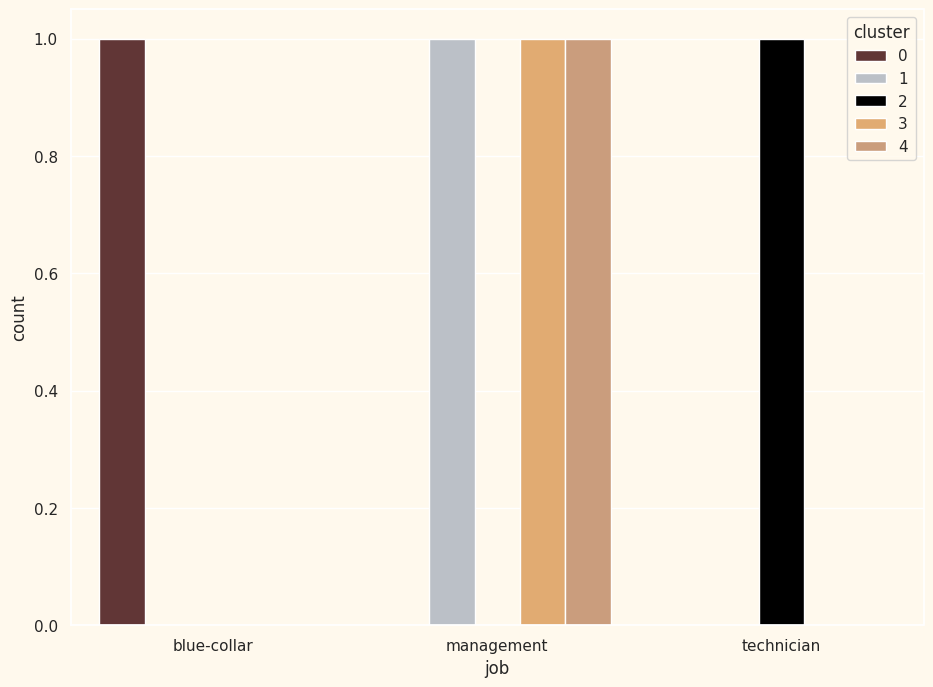

In [55]:
pal = ["#682F2F","#B9C0C9", "#000000","#F3AB60", "#D79B70"]

plt.figure()
pl = sns.countplot(x=final["job"],hue=final["cluster"], palette= pal)
plt.show()

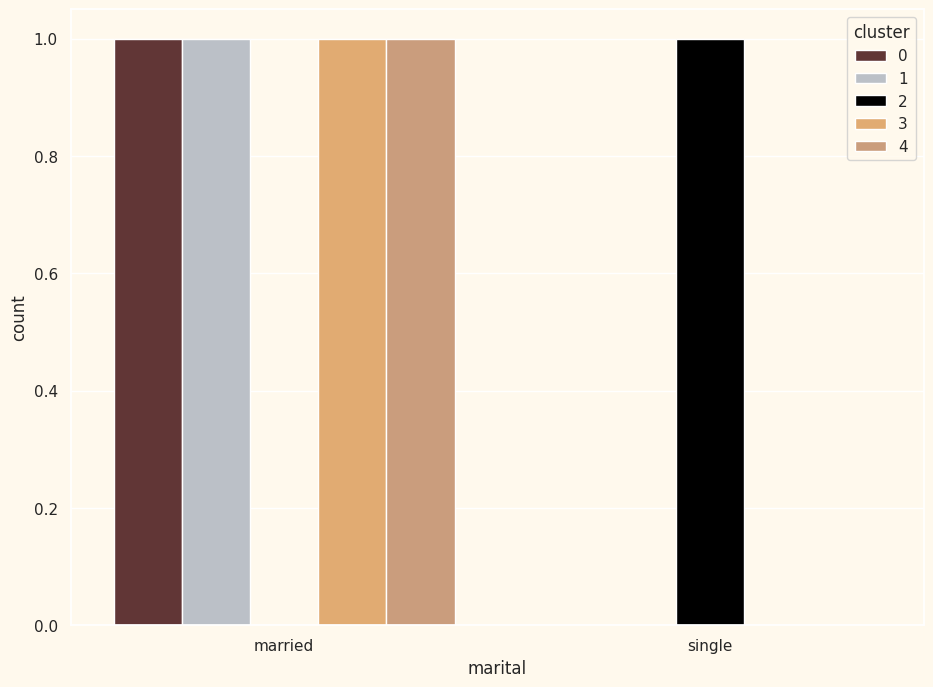

In [57]:
plt.figure()
pl = sns.countplot(x=final["marital"],hue=final["cluster"], palette= pal)

plt.show()

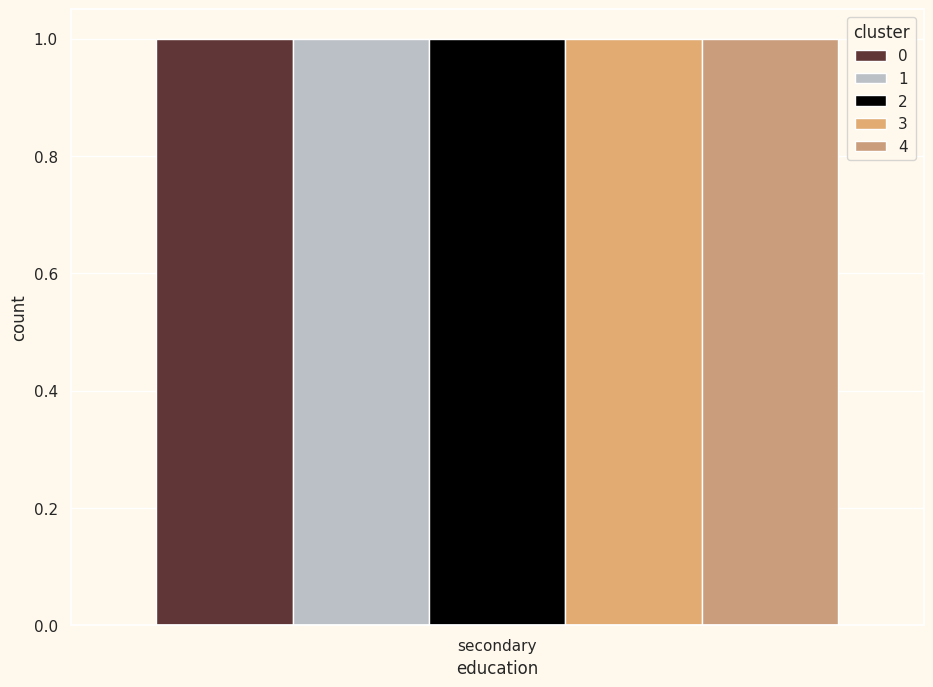

In [58]:
sns.countplot(x=final['education'],
              hue=final['cluster'], palette=pal)
#plt.xticks(rotation=50)
plt.show();

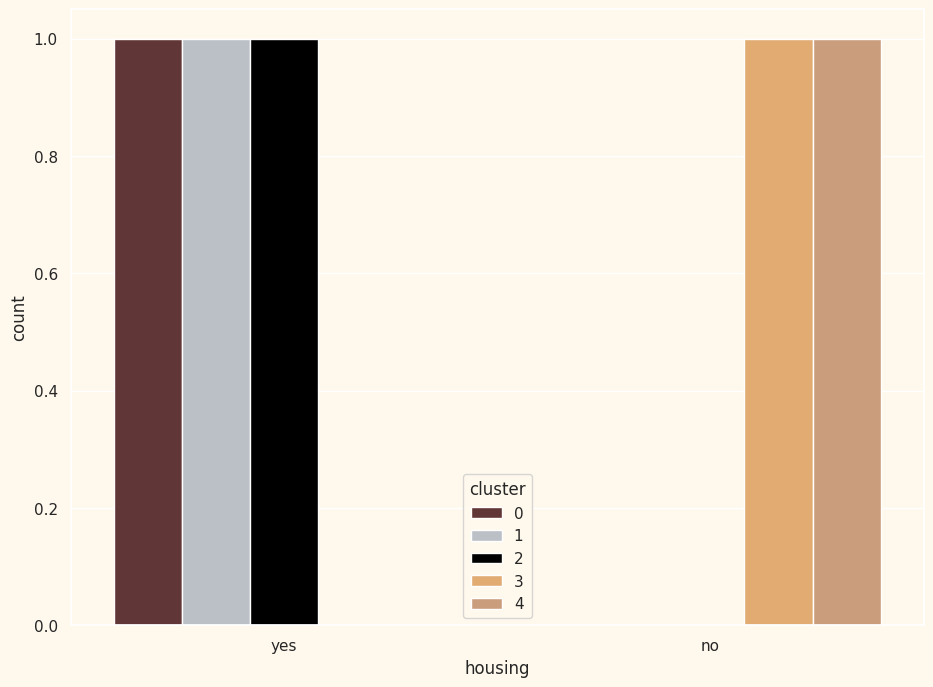

In [59]:
sns.countplot(x=final['housing'],
              hue=final['cluster'], palette=pal)
#plt.xticks(rotation=50)
plt.show();

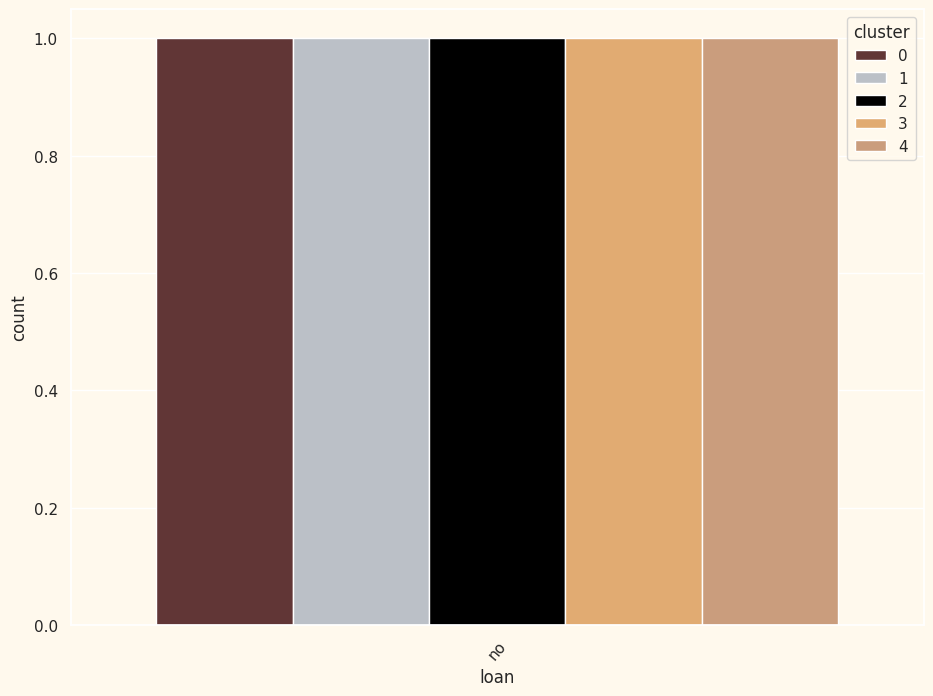

In [60]:
sns.countplot(x=final['loan'],
              hue=final['cluster'], palette=pal)
plt.xticks(rotation=50)
plt.show();

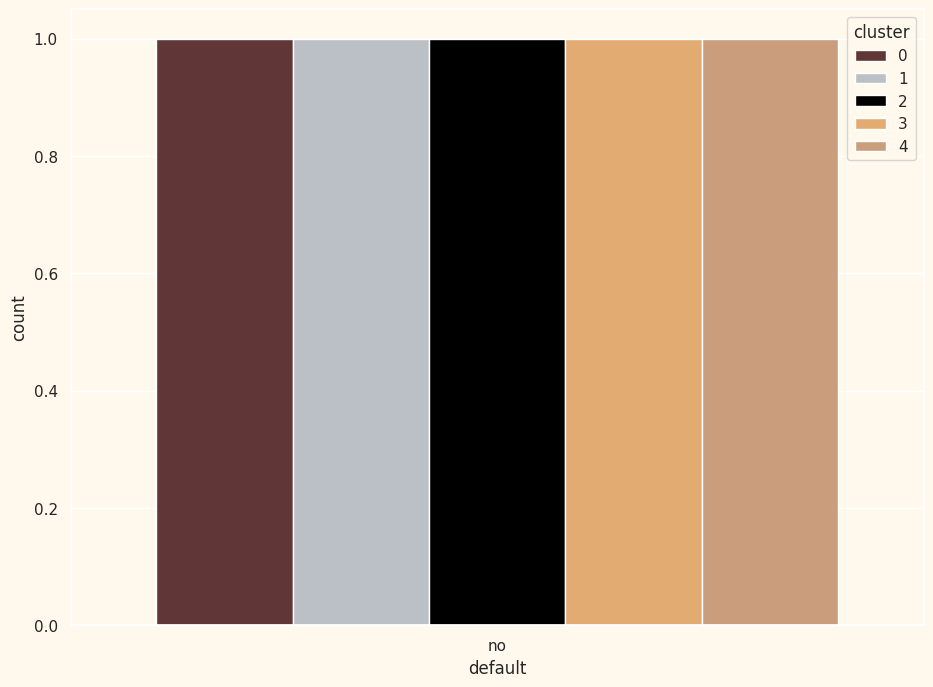

In [61]:
sns.countplot(x=final['default'],
              hue=final['cluster'], palette=pal)
#plt.xticks(rotation=50)
plt.show();

<ipython-input-68-97c7f6b6094b>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


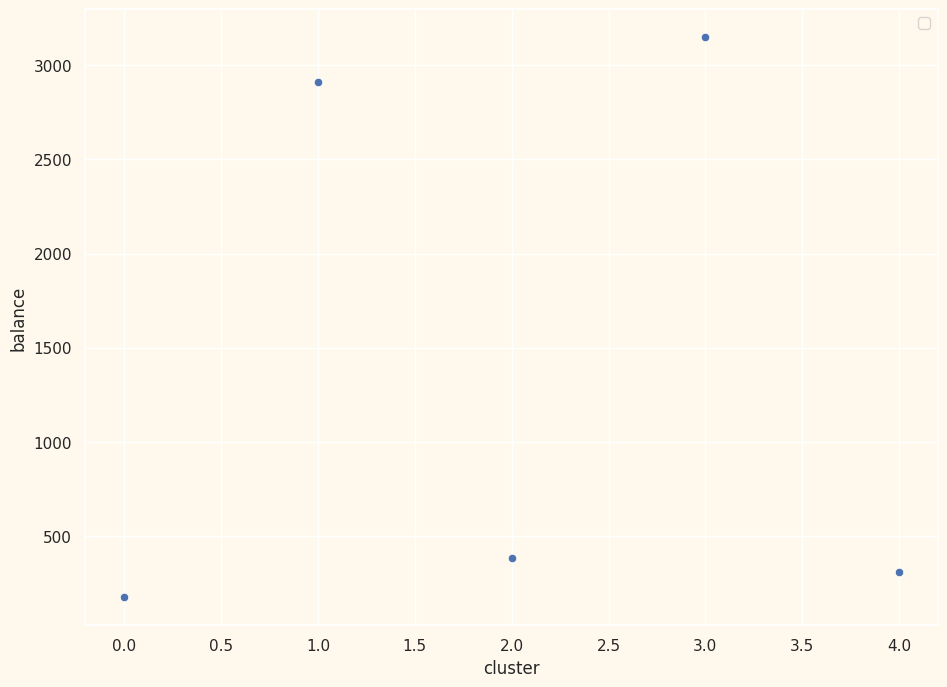

In [68]:
pl = sns.scatterplot(data = final, x=final["cluster"], y=final["balance"],
                      palette= pal)
plt.legend()
plt.show()

<ipython-input-67-7604f6da64f2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


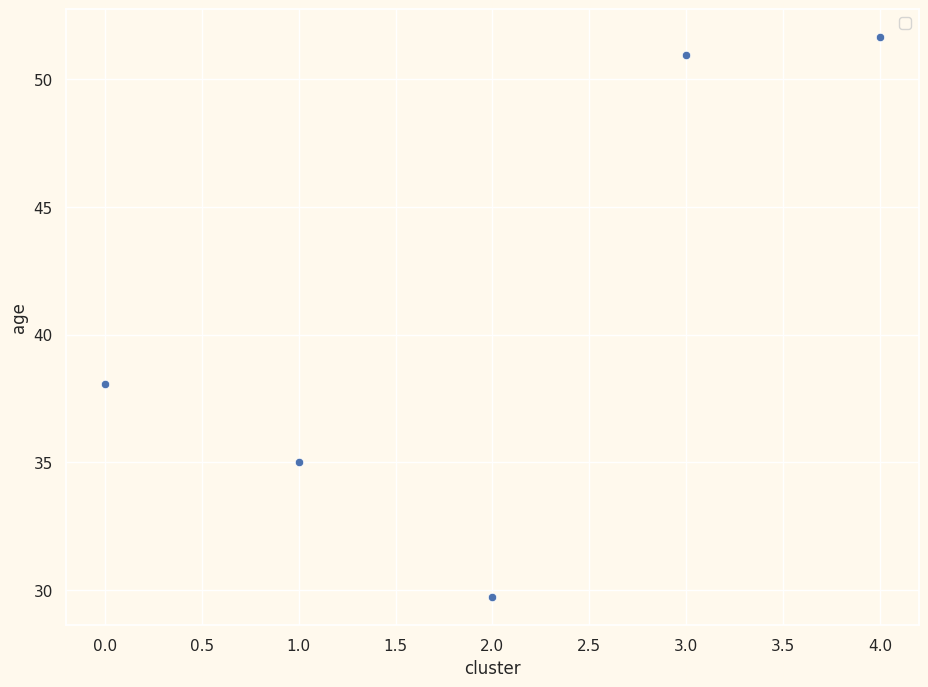

In [67]:
pl = sns.scatterplot(data = final, x=final["cluster"], y=final["age"],
                     palette= pal)
plt.legend()
plt.show()

In [64]:
print(df_no_outliers.loc[df_no_outliers['cluster'] == 0]['balance'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 1]['balance'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 2]['balance'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 3]['balance'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 4]['balance'].describe())

count    11165.000000
mean       175.630990
std        293.121598
min      -1212.000000
25%          0.000000
50%        119.000000
75%        356.000000
max       1087.000000
Name: balance, dtype: float64 count     7208.000000
mean      2910.321310
std       2478.349543
min        603.000000
25%       1333.000000
50%       2048.000000
75%       3518.250000
max      22569.000000
Name: balance, dtype: float64 count    7813.000000
mean      383.458723
std       369.179533
min      -466.000000
25%        88.000000
50%       307.000000
75%       593.000000
max      2355.000000
Name: balance, dtype: float64 count     5903.000000
mean      3148.141284
std       2557.412624
min        958.000000
25%       1467.000000
50%       2257.000000
75%       3815.000000
max      24450.000000
Name: balance, dtype: float64 count    8601.000000
mean      309.905709
std       301.281554
min      -714.000000
25%        37.000000
50%       250.000000
75%       535.000000
max      1024.000000
Name: balance, d

In [65]:
print(df_no_outliers.loc[df_no_outliers['cluster'] == 0]['age'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 1]['age'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 2]['age'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 3]['age'].describe(),
      df_no_outliers.loc[df_no_outliers['cluster'] == 4]['age'].describe())

count    11165.000000
mean        38.060725
std          4.128803
min         27.000000
25%         35.000000
50%         38.000000
75%         41.000000
max         54.000000
Name: age, dtype: float64 count    7208.000000
mean       35.021643
std         3.992372
min        23.000000
25%        32.000000
50%        35.000000
75%        38.000000
max        43.000000
Name: age, dtype: float64 count    7813.000000
mean       29.722130
std         2.929137
min        21.000000
25%        28.000000
50%        30.000000
75%        32.000000
max        39.000000
Name: age, dtype: float64 count    5903.000000
mean       50.934271
std         6.213426
min        40.000000
25%        46.000000
50%        50.000000
75%        55.000000
max        78.000000
Name: age, dtype: float64 count    8601.000000
mean       51.644344
std         5.874868
min        39.000000
25%        47.000000
50%        51.000000
75%        56.000000
max        82.000000
Name: age, dtype: float64


# **Profiling The Clusters**

***About Cluster Number 0:***



*   Most of the bank's customers have blue-collar jobs.

*   We have clients who are mostly married.
*   More clients have a secondary level of education.
*   Most clients are homeowners with housing loans.

*   The majority of clients do not have personal loans.
*   The prevalent feature is that the clients have no credit defaults.


*   The average yearly balance is 175 euros, and the average age of bank clients is around 38 years.







***About Cluster Number 1:***



*   The majority of the bank's customers are in management positions.

*   We have clients who are mostly married.
*   More clients have a secondary level of education.
*   Most clients are homeowners with housing loans.

*   The majority of clients do not have personal loans.
*   The prevalent feature is that the clients have no credit defaults.


*   The average yearly balance is 2910 euros, and the average age of bank clients is around 35 years.

***About Cluster Number 2:***



*  The majority of the bank's customers are technicians.

*  We have clients who are mostly single.
*   More clients have a secondary level of education.
*   Most clients are homeowners with housing loans.

*   The majority of clients do not have personal loans.
*   The prevalent feature is that the clients have no credit defaults.


*   The average yearly balance is 383 euros, and the average age of bank clients is around 29 years.

***About Cluster Number 3:***



*   The majority of the bank's customers are in management positions.

*  We have clients who are mostly single.
*   More clients have a secondary level of education.


*   Most clients  do not have housing loans

*   The majority of clients do not have personal loans.
*   The prevalent feature is that the clients have no credit defaults.


*   The average yearly balance is 3148 euros, and the average age of bank clients is around 50 years.

***About Cluster Number 4:***



*   The majority of the bank's customers are in management positions.

*  We have clients who are mostly single.
*   More clients have a secondary level of education.


*   Most clients  do not have housing loans

*   The majority of clients do not have personal loans.
*   The prevalent feature is that the clients have no credit defaults.


*   The average yearly balance is 309 euros, and the average age of bank clients is around 52 years.

Here's a summarized deduction about each cluster:

**Cluster Number 0:**
Cluster 0 represents the "Working Class" with a focus on blue-collar jobs. These clients are typically married, have secondary-level education, and are homeowners. They tend to be financially conservative, as they have low personal loans and rarely have credit defaults. The cluster has a relatively younger average age of around 38. Let’s call the customers in this cluster `The Working Class Savers`.

**Cluster Number 1:**
Cluster 1 is the "Management Class." Clients in this group predominantly hold management positions, are mostly married, and possess secondary-level education. They have higher average balances, indicating a more affluent customer segment, with an average age of about 35. Let’s call them `The Management Elite`.

**Cluster Number 2:**
Cluster 2 stands out as the "Tech-Savvy Singles." Clients are primarily technicians who are often single and have secondary-level education. They tend to be homeowners with housing loans and share the traits of low personal loans and credit defaults. This cluster represents a relatively younger clientele, with an average age of around 29. Let’s call the customers in this cluster `The Tech-Savvy Singles`.

**Cluster Number 3:**
Cluster 3 is the "Management Singles." Clients are in management roles, typically single, and have secondary-level education. They differ from other clusters by their lack of housing loans, but like the others, they have low personal loans and credit defaults. This cluster represents an older clientele, with an average age of around 50. Let’s call them `The Senior Managers`.

**Cluster Number 4:**
Cluster 4, similar to Cluster 3, represents the "Management Singles" but with a different distribution of the same traits. These clients are often single, have secondary-level education, and do not have housing loans. Like other clusters, they have low personal loans and credit defaults. This cluster has an older average age of around 52. Let’s call them `The Wise Investors`.



Based on the information i provided for each cluster, here are tailored marketing strategies for each:

**Cluster Number 0 - The Working Class Savers:**

Marketing Strategy:
- Offer savings and investment products that cater to customers looking to grow their wealth over time.
- Promote financial education and budgeting tools to help them manage their finances.
- Provide special offers on home improvement loans or insurance options to target homeowners.

**Cluster Number 1 - The Management Elite:**

Marketing Strategy:
- Introduce premium banking services, such as exclusive credit card offers or investment advisory.
- Organize financial seminars and workshops to help them make informed investment decisions.
- Offer personalized wealth management services for clients with higher balances.

**Cluster Number 2 - The Tech-Savvy Singles:**

Marketing Strategy:
- Focus on digital channels for communication(Utilize social media and online advertising channels for maximum reach.
 ) and banking services.
- Offer tech-related banking products, like cryptocurrency trading options or online investment tools.
- Create first-time homebuyer programs to attract potential homeowners.

**Cluster Number 3 - The Senior Managers:**

Marketing Strategy:
- Promote retirement planning and pension products tailored to their age group.
- Emphasize estate planning services and wealth transfer solutions.
- Offer loyalty programs to retain these valuable, older clients.

**Cluster Number 4 - The Wise Investors:**

Marketing Strategy:
- Provide investment opportunities and wealth management services to help them diversify their portfolios.
- Highlight long-term financial planning, retirement, and legacy building.
- Offer preferred rates on loans and insurance products for clients in this age group.